

#Sentiment analysis on preprocessed song lyrics


In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df = pd.read_csv('song_lyrics_sampled_proc.csv')

In [41]:
"""
apply sentiment analysis:
polarity_scores() returns a dictionary with four key sentiment metrics that
provide a comprehensive view of the sentiment:

- neg (negative): proportion of text that is perceived as negative
    range:  0-1   ->  higher values indicate a stronger presence of negative sentiment

- neu (neutral): proportion of text that is perceived as neutral
    range:  0-1   ->  higher values indicate a stronger presence of neutral sentiment

- pos (positive): proportion of text that is perceived as positive
    range:  0-1   ->  higher values indicate a stronger presence of positive sentiment

-compound: normalized, weighted composite score that summarizes the overall sentiment of the text
    range: -1, 1  ->    Values close to 1 indicate extremely positive sentiment.
                        Values close to -1 indicate extremely negative sentiment.
                        Values around 0 indicate neutral sentiment.
"""

df['sentiment'] = df['lyrics_proc'].apply(lambda x: sia.polarity_scores(x))

# separate the sentiment scores into individual columns
sentiment_df = df['sentiment'].apply(pd.Series)

df = pd.concat([df, sentiment_df], axis=1)

# Drop the 'sentiment' column
df.drop(columns=['sentiment'], inplace=True)

In [42]:
from tabulate import tabulate

columns_to_display = ['title', 'artist', 'year', 'neg', 'neu', 'pos', 'compound']

print(tabulate(df[columns_to_display].head(), headers='keys', tablefmt='pretty'))

+---+------------------------------+---------------------+------+-------+-------+-------+----------+
|   |            title             |       artist        | year |  neg  |  neu  |  pos  | compound |
+---+------------------------------+---------------------+------+-------+-------+-------+----------+
| 0 |          Toothpick           |    Biting Elbows    | 2012 | 0.18  | 0.661 | 0.159 |  0.0258  |
| 1 |         6 Feet Under         |    Ana Johnsson     | 2004 | 0.14  | 0.86  |  0.0  | -0.9325  |
| 2 | The Poetaster Act 4. Scene 2 |     Ben Jonson      | 1601 | 0.122 | 0.738 | 0.14  |  0.705   |
| 3 |           Hes Gone           | Phil Lesh & Friends | 2015 | 0.059 | 0.74  | 0.201 |  0.9516  |
| 4 |        Ill Never Say         |     Helen Ward      | 2015 | 0.286 | 0.539 | 0.174 | -0.8152  |
+---+------------------------------+---------------------+------+-------+-------+-------+----------+


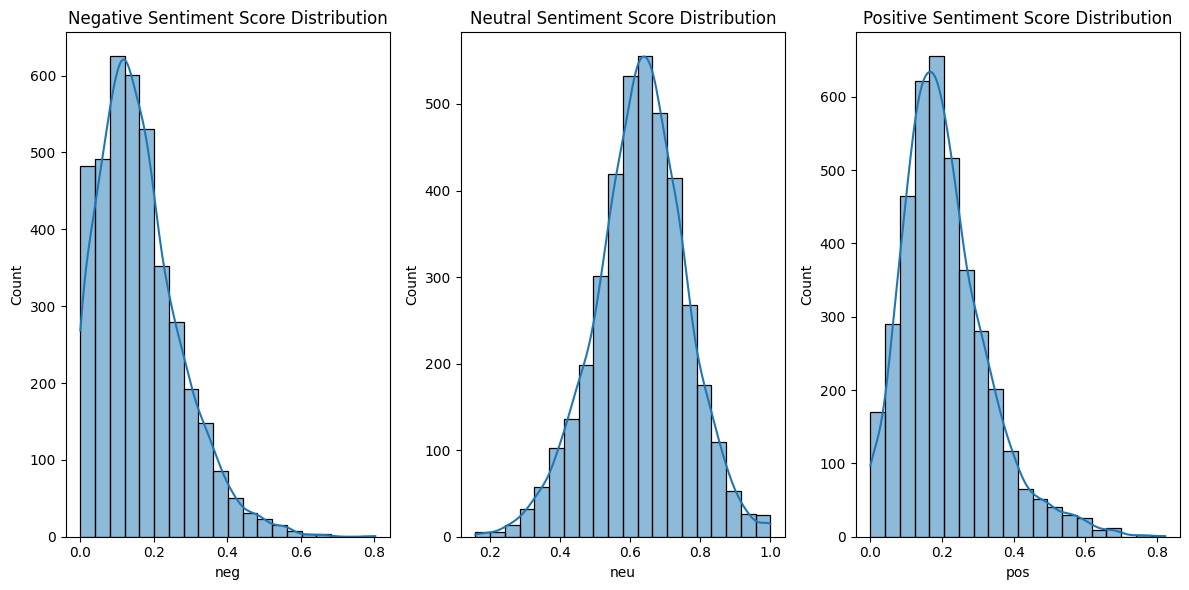

In [43]:
plt.figure(figsize=(12, 6))

# histogram for negative scores
plt.subplot(1, 3, 1)
sns.histplot(df['neg'], bins=20, kde=True)
plt.title('Negative Sentiment Score Distribution')

# histogram for neutral scores
plt.subplot(1, 3, 2)
sns.histplot(df['neu'], bins=20, kde=True)
plt.title('Neutral Sentiment Score Distribution')

# histogram for positive scores
plt.subplot(1, 3, 3)
sns.histplot(df['pos'], bins=20, kde=True)
plt.title('Positive Sentiment Score Distribution')

plt.tight_layout()
plt.show()

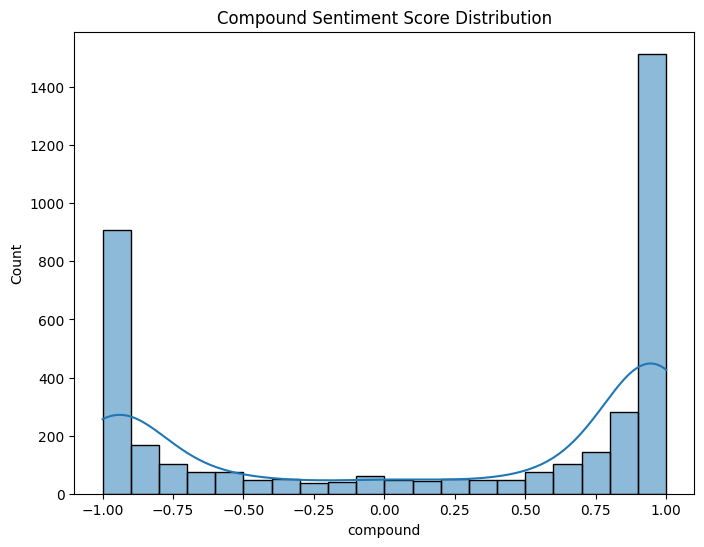

In [44]:
# histogram for compound scores
plt.figure(figsize=(8, 6))
sns.histplot(df['compound'], bins=20, kde=True)
plt.title('Compound Sentiment Score Distribution')
plt.show()

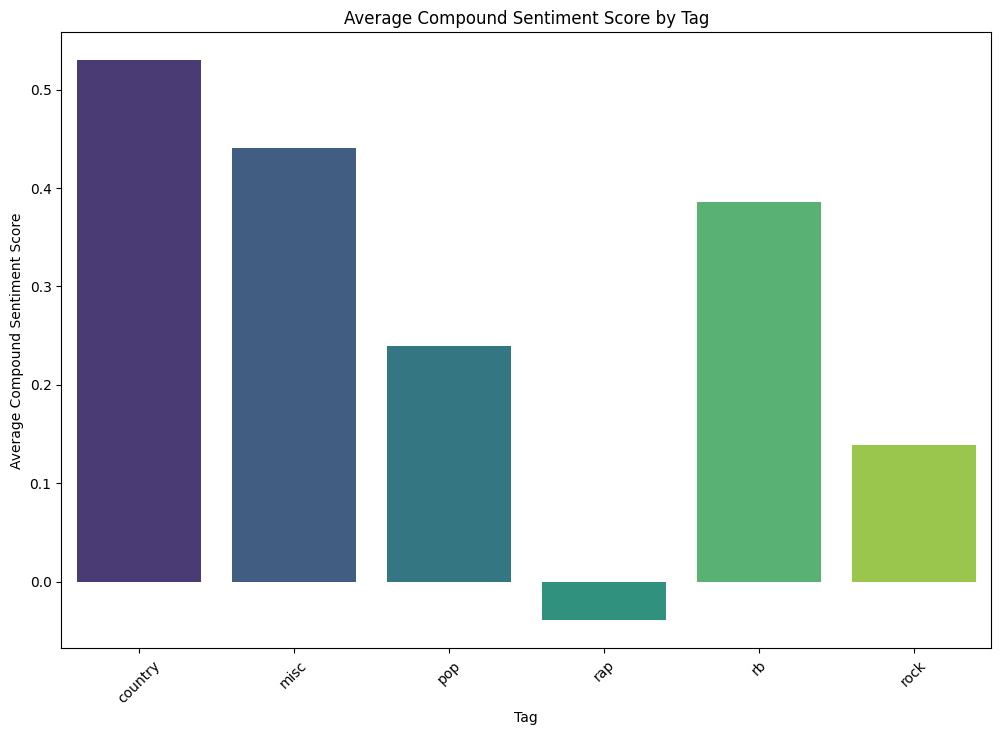

In [45]:
plt.figure(figsize=(12, 8))

# bar plot for average compound sentiment score by tag
sns.barplot(
    x=df.groupby('tag')['compound'].mean().index,
    y=df.groupby('tag')['compound'].mean().values,
    hue=df.groupby('tag')['compound'].mean().index,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Average Compound Sentiment Score by Tag')
plt.xlabel('Tag')
plt.ylabel('Average Compound Sentiment Score')

plt.xticks(rotation=45)

plt.show()


In [46]:
#df.to_csv("song_lyrics_sampled_sentiment.csv", header='true', index=False)